In [1]:
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt
 import seaborn as sns

In [2]:
 df = pd.read_csv(r"C:\Users\USER\Downloads\youtube_recommendation_dataset -.csv")
 df.head()

,Title,channel_title,published_at,category_id,view_count,like_count,comment_count,favorite_count,duration,definition,caption,engagement_rate,likes_to_views_ratio,comments_to_views_ratio,duration_seconds,video_age_days
0,LA PERVERSA X LA INSUPERABLE X ALOFOKE MUSIC X...,AlofokeMusicSounds,2025-11-16 15:34:55+00:00,10,1405647,140463,9063,0,PT1M51S,hd,False,0.106375,0.099928,0.006448,111,1
1,Moana | Official Teaser,Disney,2025-11-17 17:00:47+00:00,24,2776847,26801,6684,0,PT1M,hd,True,0.012059,0.009652,0.002407,60,0
2,$0 - $1 Trillion Only FISHING in Steal a Brain...,CaylusBlox,2025-11-17 22:57:14+00:00,20,1189857,16174,1827,0,PT18M2S,hd,False,0.015129,0.013593,0.001535,1082,0
3,ALLDAY PROJECT - ‘ONE MORE TIME’ M/V,THEBLACKLABEL,2025-11-17 09:00:07+00:00,10,5319161,0,12869,0,PT3M23S,hd,True,0.002419,0.000000,0.002419,203,1
4,La Lupa | Vendetta Hero Trailer | Overwatch 2,PlayOverwatch,2025-11-17 17:00:06+00:00,20,597542,41742,4728,0,PT3M35S,hd,True,0.077768,0.069856,0.007912,215,0


In [3]:
df.dtypes

Title                       object
channel_title               object
published_at                object
category_id                  int64
view_count                   int64
like_count                   int64
comment_count                int64
favorite_count               int64
duration                    object
definition                  object
caption                       bool
engagement_rate            float64
likes_to_views_ratio       float64
comments_to_views_ratio    float64
duration_seconds             int64
video_age_days               int64
dtype: object

In [4]:
df.isnull().sum()

Title                      0
channel_title              0
published_at               0
category_id                0
view_count                 0
like_count                 0
comment_count              0
favorite_count             0
duration                   0
definition                 0
caption                    0
engagement_rate            0
likes_to_views_ratio       0
comments_to_views_ratio    0
duration_seconds           0
video_age_days             0
dtype: int64

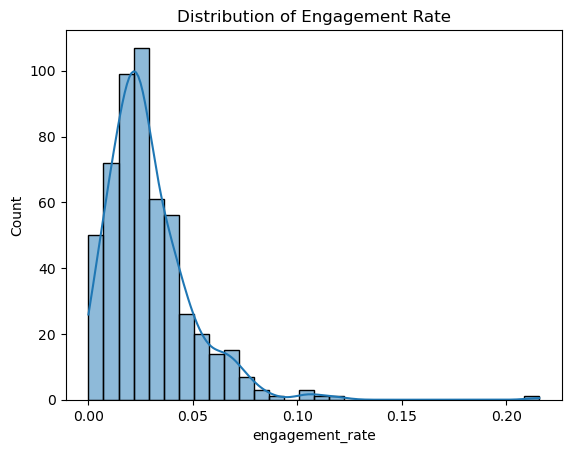

In [5]:
sns.histplot(df['engagement_rate'], bins=30, kde=True)
plt.title("Distribution of Engagement Rate")
plt.show()

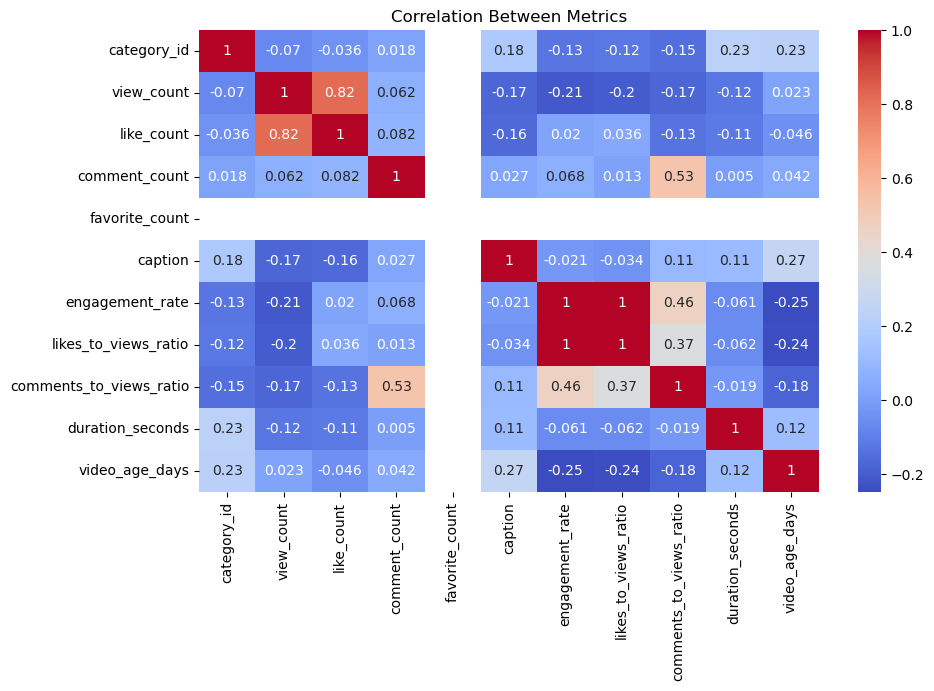

In [6]:
corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Between Metrics")
plt.show()

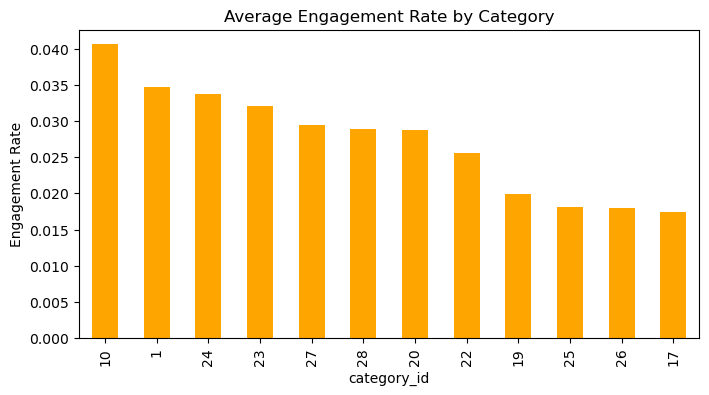

In [7]:
cat_engagement = df.groupby('category_id')['engagement_rate'].mean().sort_values(ascending=False)
cat_engagement.plot(kind='bar', color='orange', figsize=(8,4))
plt.title("Average Engagement Rate by Category")
plt.ylabel("Engagement Rate")
plt.show()

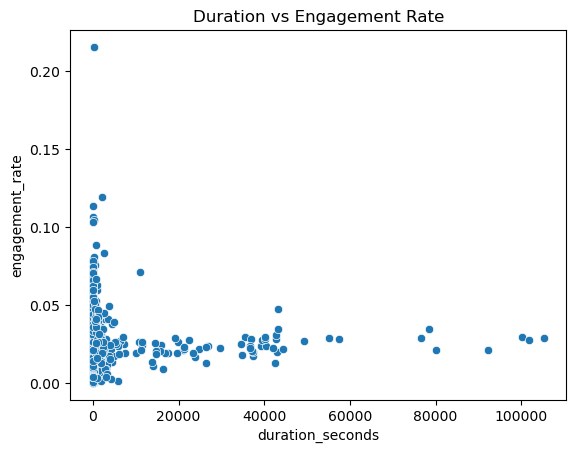

In [8]:
sns.scatterplot(x='duration_seconds', y='engagement_rate', data=df)
plt.title("Duration vs Engagement Rate")
plt.show()

In [9]:
df['log_views'] = np.log1p(df['view_count'])
df['like_ratio'] = df['like_count'] / df['view_count']
df['comment_ratio'] = df['comment_count'] / df['view_count']
df['days_since_upload'] = df['video_age_days']

In [10]:
X = df.drop(['Title', 'channel_title', 'published_at', 'engagement_rate'], axis=1)

In [11]:
y = df['engagement_rate']

In [12]:
df = df.drop(['Title', 'channel_title', 'published_at', 'duration', 'favorite_count'], axis=1)

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
df['definition'] = df['definition'].map({'hd': 1, 'sd': 0})
df['caption'] = df['caption'].astype(int)

In [15]:
X = df.drop(['engagement_rate'], axis=1)
y = df['engagement_rate']

In [16]:
scaler = StandardScaler()

In [17]:
X_scaled = scaler.fit_transform(X)

In [18]:
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

In [19]:
X_scaled.describe().T[['mean', 'std']]

,mean,std
category_id,5.292683e-17,1.000932
view_count,-2.646342e-17,1.000932
like_count,2.646342e-17,1.000932
comment_count,-3.307927e-18,1.000932
definition,-4.631098e-17,1.000932
caption,0.000000e+00,1.000932
likes_to_views_ratio,5.292683e-17,1.000932
comments_to_views_ratio,-2.646342e-17,1.000932
duration_seconds,0.000000e+00,1.000932
video_age_days,4.631098e-17,1.000932


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=200, random_state=42)

In [21]:
y_pred = rf.predict(X_test)

In [22]:
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R²:", r2_score(y_test, y_pred))

MAE: 0.0009797500895191138
R²: 0.9830783819967388


In [24]:
from sklearn.metrics import mean_absolute_error, r2_score
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

In [25]:
print("Train R²:", r2_score(y_train, y_train_pred))
print("Test R²:", r2_score(y_test, y_test_pred))

Train R²: 0.9882813417208572
Test R²: 0.9830783819967388


In [26]:
import joblib

In [28]:
joblib.dump(rf, "engagement_model.pkl")

['engagement_model.pkl']

In [29]:
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']